# MNIST Prediction with Keras and TensorFlow

- MNIST dataset: is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
- Goal: build a simple artificial neural network to predict the digit in the images.

### 1. Import libraries

In [14]:
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [15]:
# for training the model
from keras import datasets, models, layers, utils

# for linear algebra
import numpy as np

# for plotting data, loss, accuracy
import matplotlib.pyplot as plt

### 2. Utils functions

In [16]:
def plot_data(
    X: np.ndarray,
    y: np.ndarray,
    y_proba: np.ndarray = None,
    shape: tuple[int, int] = (2, 4),
) -> None:
    nrows, ncols = shape
    _, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

    len_x = X.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]

        img_idx = np.random.randint(0, len_x)

        ax.imshow(X[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])

        true_label = f"True: {y[img_idx]}"
        color = "black"

        if y_proba is not None:
            pred_label = f"Pred: {y_proba[img_idx]}"
            color = "green" if y[img_idx] == y_proba[img_idx] else "red"

        img_title = true_label if y_proba is None else f"{true_label}\n{pred_label}"
        ax.set_xlabel(img_title, color=color)

    plt.tight_layout()
    plt.show()

### 3. Load and preprocess data

- Load the MNIST dataset
- Preprocess the data

In [17]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

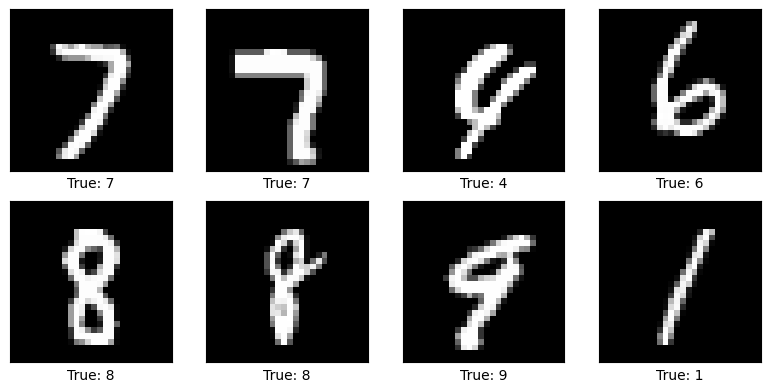

In [18]:
plot_data(X_train, y_train)

In [19]:
# Convert to float32 and scale to [0, 1]
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [20]:
# Add channel dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [21]:
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [22]:
# Convert class vectors to one-hot encoded
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [23]:
print("y_train shape:", y_train.shape)
print(y_train.shape[0], "train samples")
print(y_test.shape[0], "test samples")

y_train shape: (60000, 10)
60000 train samples
10000 test samples


### 4. Train the model

In [24]:
model = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer="adam", loss="categorical_crossentropy")

In [26]:
batch_size = 128
epochs = 10

history = model.fit(
    X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

Epoch 1/10


422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4444 - val_loss: 0.1010
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0920 - val_loss: 0.0838
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0516 - val_loss: 0.0685
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0356 - val_loss: 0.0669
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0246 - val_loss: 0.0728
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195 - val_loss: 0.0868
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187 - val_loss: 0.0695
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0121 - val_loss: 0.0720
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0103 - val_loss: 0.0832
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0134 - val_loss: 0.0811


### 5. Evaluate the model

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'val_loss'])

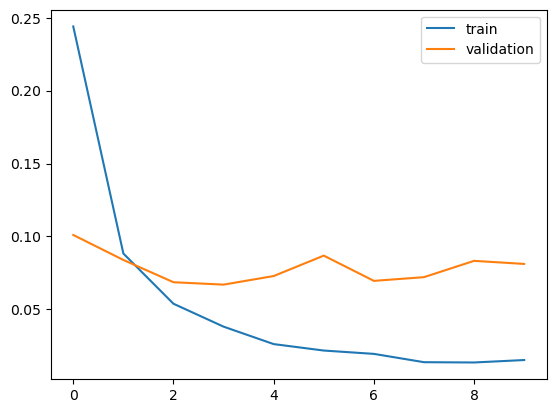

In [28]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.show()

### 6. Predict the test set

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", score)

Test loss: 0.09007512032985687


In [30]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


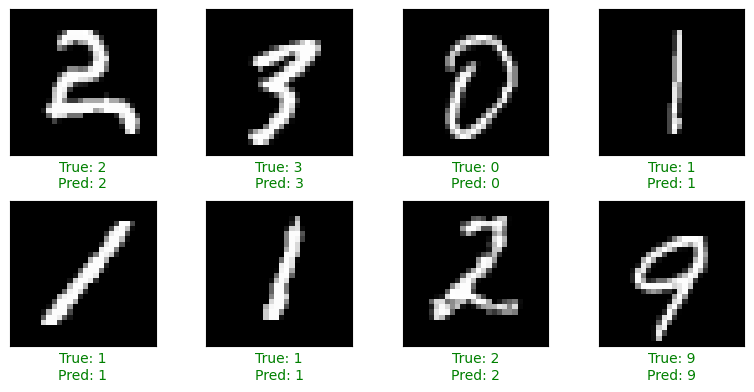

In [31]:
plot_data(X_test, np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))